# Reuters Newswires Topic Classification using Densely Connected Neural Network

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Utility function to vectorize the words in each sequence

def vectorize_sequences(sequences, dimension=10000):
    vectorized_sequences = np.zeros((len(sequences), dimension), dtype='float32')
    for i, sequence in enumerate(sequences, start=0):
        vectorized_sequences[i, sequence] = 1.
    return vectorized_sequences

In [3]:
# Loads training and testing data

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

/home/pradip/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/pradip/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
# Checks the maximum word index in training data

print("Maximum word index in training data: ", max([np.max(seq) for seq in x_train]))

Maximum word index in training data:  9999


#### Gets the review comment in English just for reference

In [6]:
# Gets database dictionary
word_index_dict = reuters.get_word_index()

# Reverses the order of key and value pairs to search word against its index found in training data 
index_word_dict = dict([(key, word) for (word, key) in word_index_dict.items()])

# Just checking for training data after joining words after mapping word with its index.
# Note that indices in the training data are offset by 3
' '.join([index_word_dict.get(index-3, '?') for index in x_train[0]])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
# Encodes words into vector
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

x_val = x_train[:1000]
x_train = x_train[1000:]

y_train_one_hot = to_categorical(y_train)
y_val_one_hot = y_train_one_hot[:1000]
y_train_one_hot = y_train_one_hot[1000:]

y_test_one_hot = to_categorical(y_test)

In [8]:
# Creates and compiles the model

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Trains model with 512 batch size and 20 epochs, and performs validation

history = model.fit(x_train, y_train_one_hot, batch_size=512, epochs=20, 
                    validation_data=(x_val, y_val_one_hot))

Epoch 1/20
16/16 [==============================] - 2s 59ms/step - loss: 3.2601 - accuracy: 0.3566 - val_loss: 1.7885 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.5487 - accuracy: 0.6896 - val_loss: 1.2735 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0638 - accuracy: 0.7733 - val_loss: 1.1220 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8097 - accuracy: 0.8274 - val_loss: 1.0228 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6553 - accuracy: 0.8638 - val_loss: 0.9600 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5126 - accuracy: 0.8934 - val_loss: 0.9174 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4055 - accuracy: 0.9165 - val_loss: 0.8923 - val_accuracy: 0.8160
Epoch 8/20
16

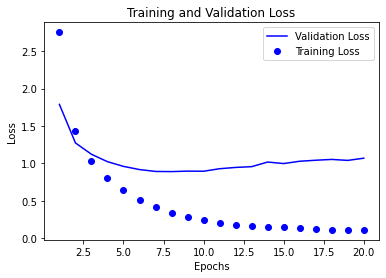

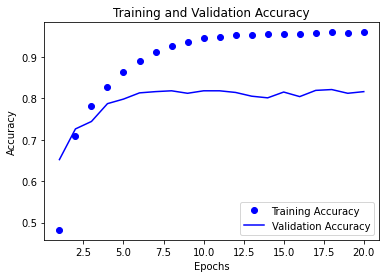

In [11]:
# Evaluates training and validation performance

history_dict = history.history

epochs = range(1, len(history_dict["accuracy"]) + 1)

val_loss = history_dict["val_loss"]
train_loss = history_dict["loss"]

train_accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]

plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.plot(epochs, train_loss, "bo", label="Training Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.figure()

plt.plot(epochs, train_accuracy, 'bo', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
# Evaluates testing performance

evaluation = model.evaluate(x_test, y_test_one_hot)

print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

71/71 [==============================] - 1s 16ms/step - loss: 1.1922 - accuracy: 0.7907
Model Performance on Test Data: Loss is  1.1922276020050049  and accuracy is  0.790739119052887


## Now, consider the above model is baselined and let's experiment with different number hiddent layers, hidden units, optimizers and activation functions.

In [13]:
# Recreates and trains model with 32 hidden units

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot, batch_size=512, epochs=20, 
                    validation_data=(x_val, y_val_one_hot), verbose=0)

# Evaluates testing performance

evaluation = model.evaluate(x_test, y_test_one_hot)

print("Model Performance on Test Data:\nLoss:", evaluation[0], "\nAccuracy:", evaluation[1])

71/71 [==============================] - 2s 27ms/step - loss: 1.1686 - accuracy: 0.7752
Model Performance on Test Data:
Loss: 1.1686413288116455 
Accuracy: 0.7751558423042297


In [15]:
# Recreates and trains model with 128 hidden units
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot, batch_size=512, epochs=20, 
                    validation_data=(x_val, y_val_one_hot), verbose=0)

# Evaluates testing performance

evaluation = model.evaluate(x_test, y_test_one_hot)

print("Model Performance on Test Data: \nLoss:", evaluation[0], "\nAccuracy:", evaluation[1])

71/71 [==============================] - 1s 13ms/step - loss: 1.3024 - accuracy: 0.7787
Model Performance on Test Data: 
Loss: 1.30235755443573 
Accuracy: 0.7787176966667175


In [16]:
# Recreates and trains model with 1 hidden unit

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot, batch_size=512, epochs=20, 
                    validation_data=(x_val, y_val_one_hot), verbose=0)

# Evaluates testing performance

evaluation = model.evaluate(x_test, y_test_one_hot)

print("Model Performance on Test Data:\nLoss:", evaluation[0], "\nAccuracy:", evaluation[1])

71/71 [==============================] - 2s 23ms/step - loss: 1.0219 - accuracy: 0.8019
Model Performance on Test Data: Loss is  1.021880865097046  and accuracy is  0.8018699884414673


In [17]:
# Recreates and trains model with 3 hidden units

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot, batch_size=512, epochs=20, 
                    validation_data=(x_val, y_val_one_hot), verbose=0)

# Evaluates testing performance

evaluation = model.evaluate(x_test, y_test_one_hot)

print("Model Performance on Test Data:\nLoss:", evaluation[0], "\nAccuracy:", evaluation[1])

71/71 [==============================] - 2s 25ms/step - loss: 1.4169 - accuracy: 0.7685
Model Performance on Test Data: Loss is  1.4168580770492554  and accuracy is  0.7684773206710815


### CONCLUSION:

#### Below are the observations.

    1. Reducing hiddent units to less than the number of classification categories is not a good idea as it looses the data representations.
    2. There is slight improvement in accuracy with just one hiddent layer.
    3. Increasing hidden layers is not improving accuracy.